# Hab Dishab Dopamine Analysis

Plotting the DA associated with different DA metrics (Peak, Mean)
- Plot the peak DA during the first investigation (With and without mice identity)
- Plot the Average peak DA across multiple investigations

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *

In [ ]:
# NAc: #15616F
# mPFC: #FFAF00

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
brain_region = '#15616F'

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
# brain_region = '#FFAF00'

save_images = False

In [3]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]


In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac\nn7-250114-100133\Notes.txt
read from t=0s to t=1376.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac\nn8-250114-103839\Notes.txt
read from t=0s to t=1352.76s
Processing nn7-250114-100133...
Processing nn8-250114-103839...


### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = True)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, #otal_avg_bout_duration
                                  mode='standard')

Processing behaviors for nn7-250114-100133...
Processing behaviors for nn8-250114-103839...
Computing DA metrics for nn7-250114-100133 ...
Computing DA metrics for nn8-250114-103839 ...


In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [8]:
da_metadata_df.head(6)

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score
0,nn7,s1-1,Investigation,-0.437516,-0.173811,-0.419076
1,nn7,s1-2,Investigation,1.162002,1.346273,0.950900
2,nn7,s1-3,Investigation,0.568585,0.721555,0.355658
3,nn7,s1-4,Investigation,-0.069088,-0.177358,-0.248345
4,nn7,s1-5,Investigation,-0.499695,-1.124084,-1.168519
5,nn7,s2-1,Investigation,22.221626,4.933930,3.268308


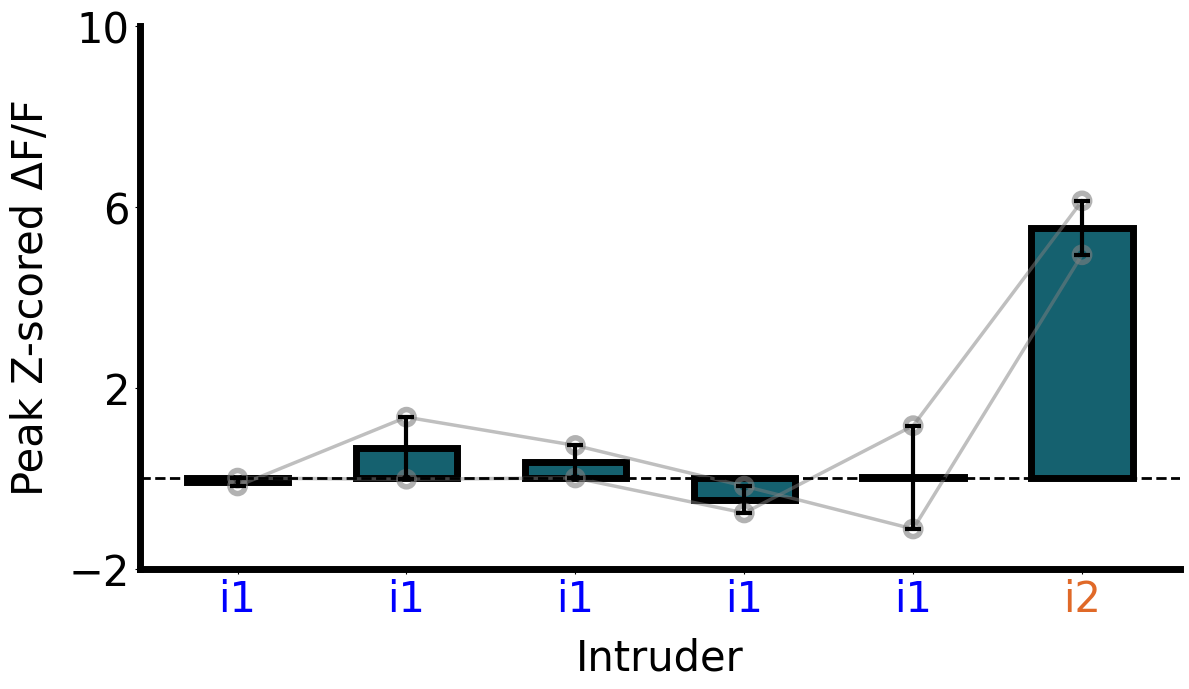


Paired t-test results:
s1-1 vs s1-2: p = 0.5103 (ns)
s1-5 vs s2-1: p = 0.0628 (ns)


In [9]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_no_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title=None,
    xlabel="Intruder",
    ylabel="Peak Z-scored ΔF/F",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 10),
    bar_color=brain_region,
    yticks_increment=4,
    figsize=(12,7),
    pad_inches=0.1,
    save=save_images,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_C1_3_Peak"
)

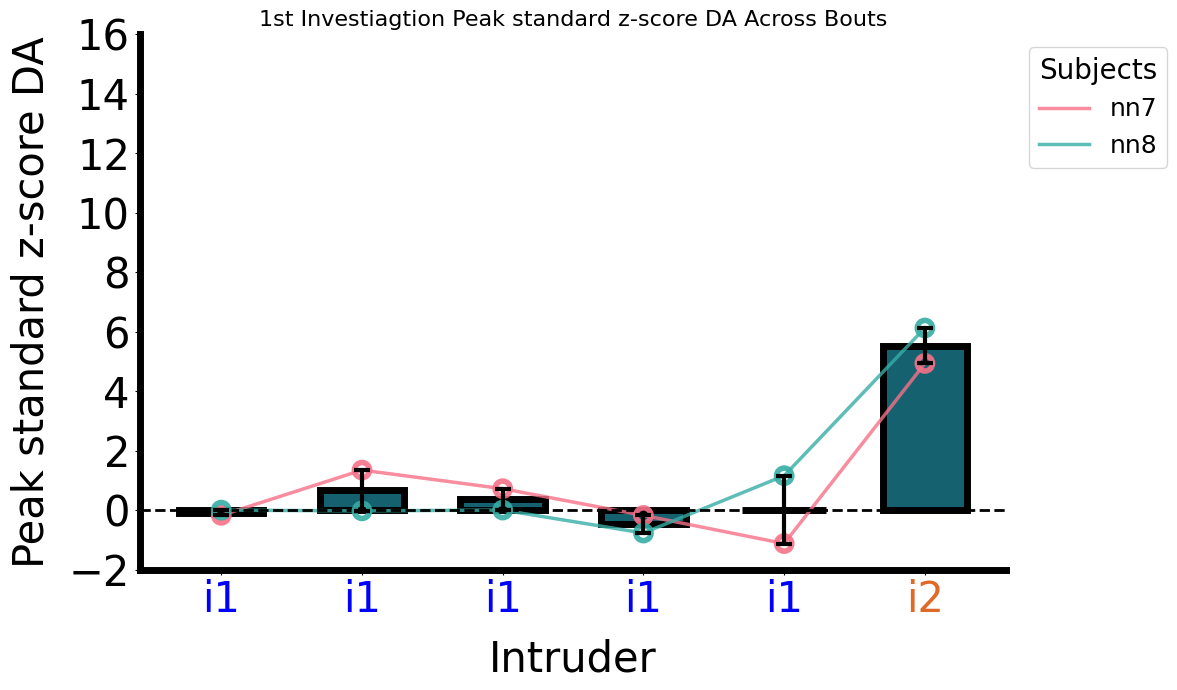

In [10]:
# Average Bout Duration Across Bouts
plot_behavior_across_bouts_with_identities(
    metadata_df=da_metadata_df,
    y_col="Max Peak",
    behavior="Investigation",
    title="1st Investiagtion Peak standard z-score DA Across Bouts",
    xlabel="Intruder",
    ylabel="Peak standard z-score DA",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(-2, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=save_images,
    save_name=r"Hab_Dishab_Plots\mPFC_DA\mPFC_Peak_Across_Bouts_WIDENTITIES.png"
)

Restart because not only looking at first investigation any longer

In [11]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, # total_avg_bout_duration 
                                  mode='standard')

Processing behaviors for nn7-250114-100133...
Processing behaviors for nn8-250114-103839...
Computing DA metrics for nn7-250114-100133 ...
Computing DA metrics for nn8-250114-103839 ...


In [12]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']

IMPORTANT NOTE OF FUNCTION: the reason why there might be a discrepancy in the number of mice displayed is because if a subject doesn't have x subsequent investigations, then the mouse is not included

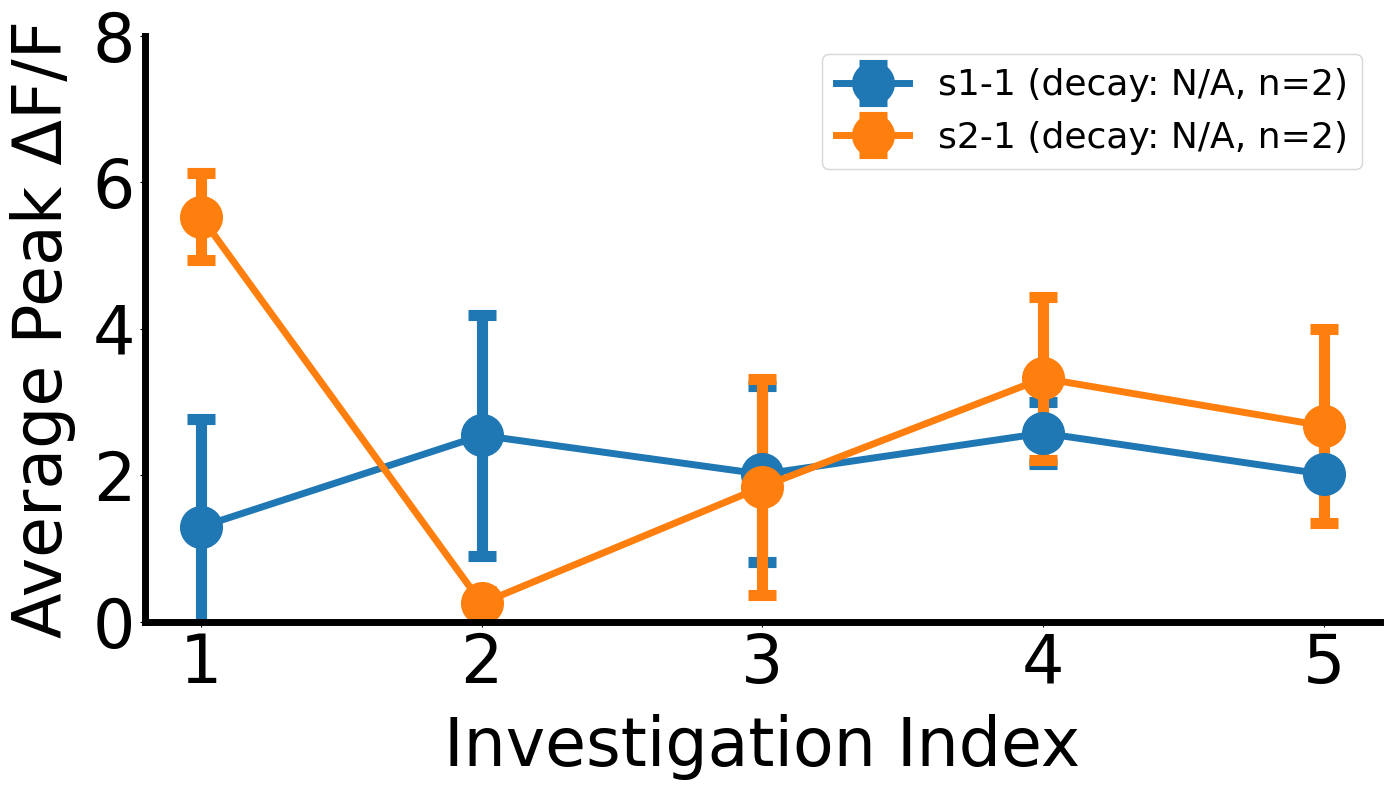


=== Computed Metric (DECAY): ===
Bout: s1-1, decay = nan
Bout: s2-1, decay = nan


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,s1-1,1,2,1.294810,2.076944,1.468621
1,s1-1,2,2,2.544193,2.326493,1.645079
2,s1-1,3,2,2.013530,1.698383,1.200938
3,s1-1,4,2,2.575006,0.592332,0.418842
4,s1-1,5,1,2.013448,NaN,NaN
5,s2-1,1,2,5.529377,0.842088,0.595446
6,s2-1,2,2,0.249764,0.231543,0.163726
7,s2-1,3,2,1.842332,2.087940,1.476397
8,s2-1,4,2,3.323698,1.579760,1.117059
9,s2-1,5,2,2.673076,1.882020,1.330789


In [13]:
plot_peak_for_subsequent_behaviors(
    exp_da_dict,
    behavior="Investigation",
    selected_bouts=["s1-1", "s2-1"],
    n_subsequent_behaviors=5,
    peak_col="Max Peak",
    metric_type='decay', 
    xlabel="Investigation Index",
    ylabel="Average Peak ΔF/F",
    ylim=(0, 8),
    ytick_increment=2,
    plot_title="",
    save = False,
    save_path=r"Hab_Dishab_Plots\mPFC_DA\peaks_for_subsequent_behaviors.png" 
)